In [14]:
from phononpy import *
import matplotlib.pyplot as plt
import cupy as cp
from timeit import default_timer as timer  

In [15]:
E = estimator(max_order=2,n_cores=10,slow=False,GPU=True)

Generating Estimator for order 2
Assembling the estimator using multiprocessing on 10 cores
Permuations created successfully
	Fast: 0, 0 Done!	Send the fast data to the pool

	Fast: 1, 0 Done!
	Fast: 2, 0 Done!
	Fast: 1, 1 Done!
	Fast: 2, 1 Done!
	Fast: 2, 2 Done!
Pool closed Successfully
recasting functions


  0%|          | 0/6 [00:00<?, ?it/s]

Estimator Generated Successfully
WARNING! Since you are using GPU accelleration you need to check that your input satisfies these conditions z < v t and (z-v t)^2 > r^2 (v^2 - 1). Otherwise there will be errors


In [10]:
# Get the fast particle waves as a function of R
def get_params(r:float,v:float,T = cp.array([-1.,60.]),N_pts:int=500):
    g = 1/(v**2-1)**0.5
    T = T + v * r
    z = r/g
    t = cp.linspace(*T,N_pts)
    
    return r,z,t,v

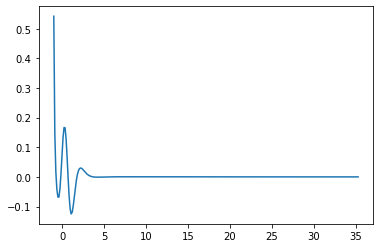

In [12]:
r,z,t,v = get_params(1.4,3)
l=2e-1
plt.plot((t-v*r).get(),E(r,z,t,v,l).get());

In [20]:
%%timeit
E(r,z,t,v,l)

2.76 s ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
 E(r,z,t,v,l)

array([ 1.06941755e-02,  9.14993041e-03,  8.51094848e-03,  7.28273568e-03,
        4.77188720e-03,  7.69179991e-04, -4.47153164e-03, -1.02572473e-02,
       -1.55846988e-02, -1.93849723e-02, -2.08219564e-02, -1.95401939e-02,
       -1.57670413e-02, -1.02327268e-02, -3.94800683e-03,  2.06877241e-03,
        7.01890945e-03,  1.04452378e-02,  1.22402824e-02,  1.25716499e-02,
        1.17708145e-02,  1.02254663e-02,  8.29912324e-03,  6.28498881e-03,
        4.38968998e-03,  2.73754581e-03,  1.38576353e-03,  3.43136584e-04,
       -4.12383755e-04, -9.19471239e-04, -1.22314233e-03, -1.36806248e-03,
       -1.39470126e-03, -1.33753121e-03, -1.22456464e-03, -1.07768201e-03,
       -9.13365305e-04, -7.43583541e-04, -5.76679026e-04, -4.18173066e-04,
       -2.71455718e-04, -1.38351723e-04, -1.95699624e-05,  8.49490596e-05,
        1.75770858e-04,  2.53773281e-04,  3.20006756e-04,  3.75595955e-04,
        4.21672676e-04,  4.59331811e-04,  4.89604094e-04,  5.13440798e-04,
        5.31706778e-04,  

In [16]:
P = estimator(max_order=2,n_cores=10,slow=False,GPU=False)

Generating Estimator for order 2
Assembling the estimator using multiprocessing on 10 cores
Permuations created successfully
	Fast: 0, 0 Done!
	Send the fast data to the pool
	Fast: 1, 0 Done!
	Fast: 2, 0 Done!
	Fast: 1, 1 Done!
	Fast: 2, 1 Done!
	Fast: 2, 2 Done!
Pool closed Successfully
recasting functions


  0%|          | 0/6 [00:00<?, ?it/s]

Estimator Generated Successfully
WARNING! Since you are using GPU accelleration you need to check that your input satisfies these conditions z < v t and (z-v t)^2 > r^2 (v^2 - 1). Otherwise there will be errors


In [18]:
%%timeit
P(r,z,t.get(),v,l)

<lambdifygenerated-24>:2: RuntimeWarning: overflow encountered in double_scalars
  return 0.0893633850921051*L**2*(-18*v**4*(-1 + (v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2/(r**2 + (v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2))*(-v + (v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)/sqrt(r**2 + (v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2))**2*(v*(t*v - z)/(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1))*(v**2 - 1)) - 1)**3*(t - sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1))/(sqrt(r**2 + (v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2)*(v**2 - 1)*(-v*(v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z) + sqrt(r**2 + (v*(-sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2))**4*(exp(-5*sqrt((

<lambdifygenerated-25>:2: RuntimeWarning: overflow encountered in double_scalars
  return 0.0569126169014339*L**2*(-6*v**3*(v - (v*(sqrt((r**2 + (-t*v + z)**2/(1 - v**2))/(1 - v**2)) - (t - v*z)/(1 - v**2)) + z)/sqrt(r**2 + (v*(sqrt((r**2 + (-t*v + z)**2/(1 - v**2))/(1 - v**2)) - (t - v*z)/(1 - v**2)) + z)**2))**3*(v*(t*v - z)/(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1))*(v**2 - 1)) + 1)**3*(v**2*((1 - (v*(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2/(r**2 + (v*(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2))/sqrt(r**2 + (v*(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2) + 2*(v - (v*(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)/sqrt(r**2 + (v*(sqrt((-r**2 + (t*v - z)**2/(v**2 - 1))/(v**2 - 1)) + (t - v*z)/(v**2 - 1)) + z)**2))**2/(v*(v*(sqrt((r**2 + (-t*v + z)**2/(1 - v**2))/(1 - v**2)) - (t - v*z)/(1 - v**2)) + z) - sqrt(r**2 + (v*(s

10.3 s ± 95.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
